In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score


In [4]:
d = pd.read_csv('heart.csv')

In [13]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [5]:
d.size

3939

In [6]:
d.shape

(303, 13)

In [7]:
d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [8]:
d.duplicated().sum()

1

In [9]:
d = d.drop_duplicates()

In [10]:
d.duplicated().sum()

0

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  target    302 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.0 KB


In [12]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [15]:
d['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [16]:
d['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

<Axes: xlabel='target', ylabel='count'>

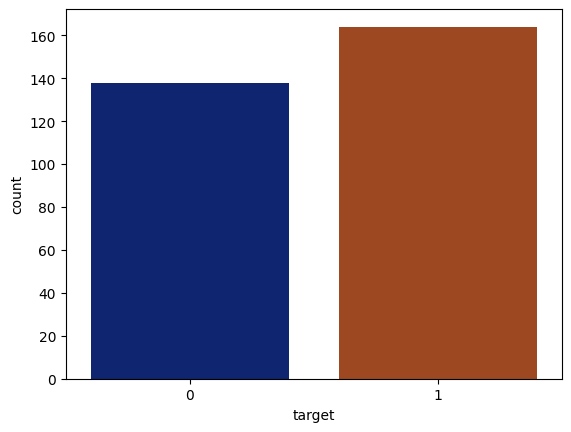

In [18]:
sns.countplot(data = d, x = 'target', palette = 'dark')

In [19]:
d.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,-0.429146


<Axes: >

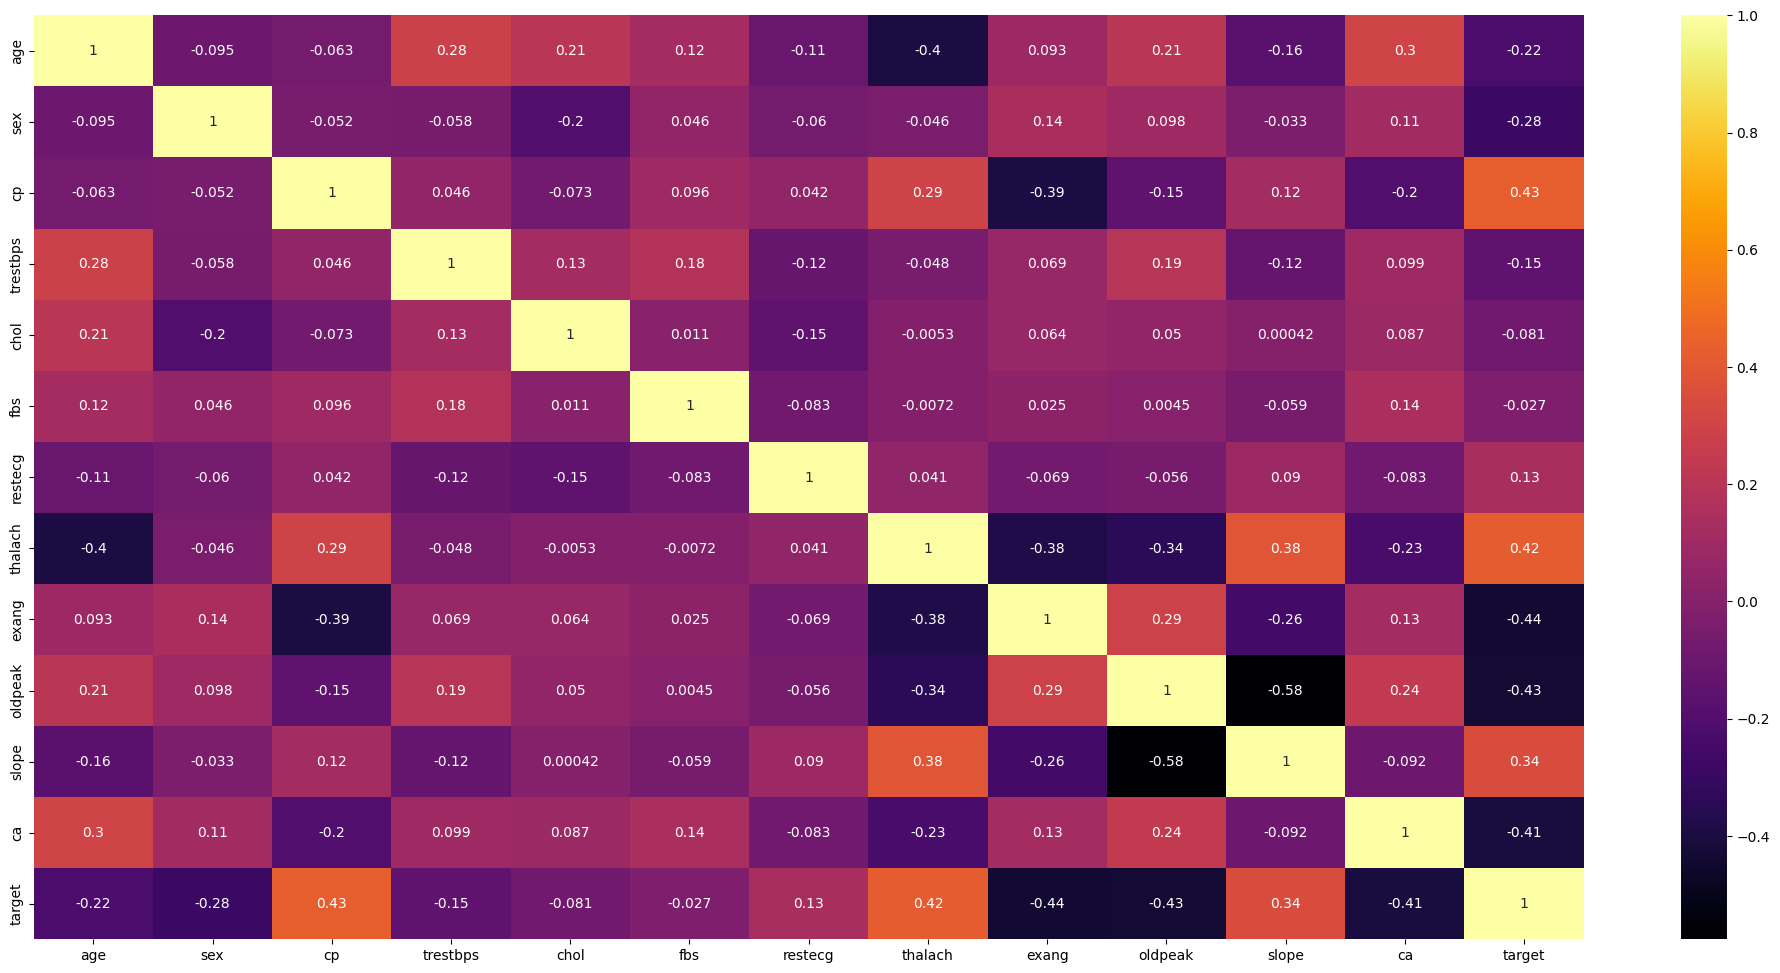

In [72]:
plt.figure(figsize=(25,12))
sns.heatmap(d.corr(),annot = True, cmap='inferno')

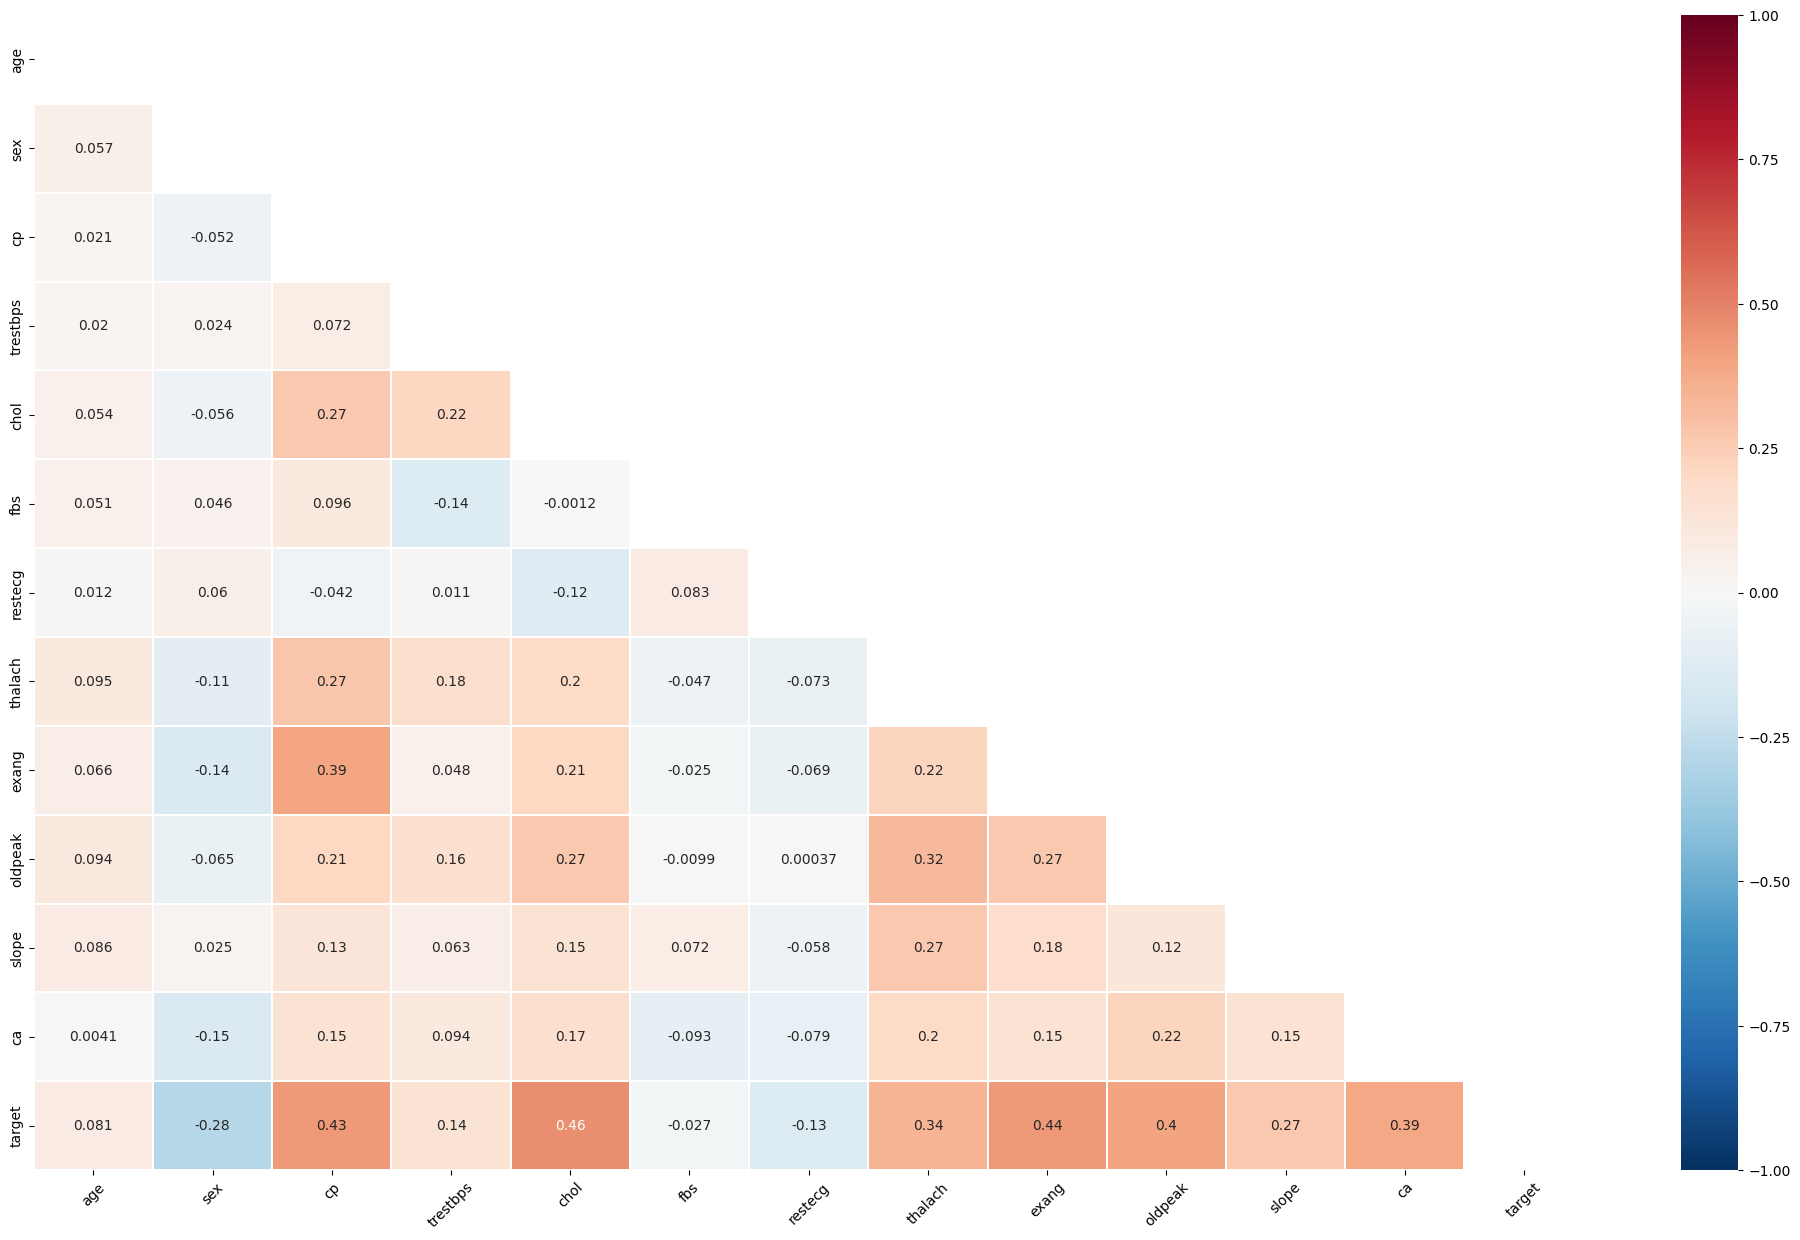

In [25]:
plt.figure(figsize=(25,15))
corr = d.apply(lambda x: pd.factorize(x)[0]).corr()
corr = corr.fillna(0)
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.xticks(rotation = 45)
plt.yticks(rotation = 90)
ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidth = 0.2, cmap = 'RdBu_r', vmin = -1, vmax = 1)

In [27]:
x = d.drop('target',axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [29]:
y = d['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [32]:
dt = tree.DecisionTreeClassifier()


In [33]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dt.predict(x_test)

In [36]:
y_train_pred = dt.predict(x_train)

In [42]:
def conm(y_train_pred,y_train,dom):
    print(f'{dom} confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf, annot = True, cmap = 'Blues')
    plt.tight_layout()
    plt.show()


In [39]:
a = accuracy_score(y_train_pred,y_train)
b = accuracy_score(y_pred,y_test)
a,b

(1.0, 0.7213114754098361)

In [45]:
# the model is overfittted since no hyperparameter tuning is done


Train Data confusion matrix


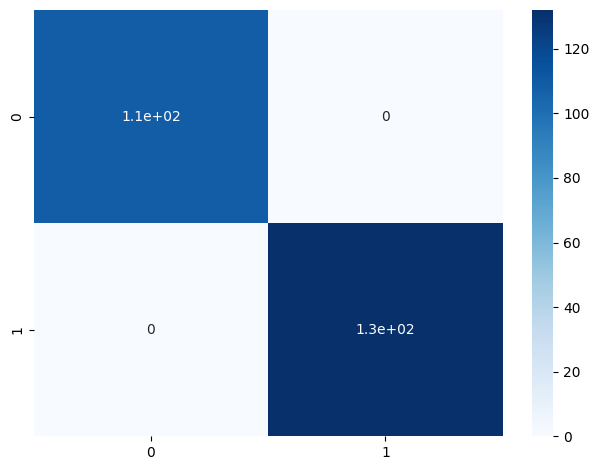

In [43]:
conm(y_train_pred,y_train,dom = 'Train Data')

Test Data confusion matrix


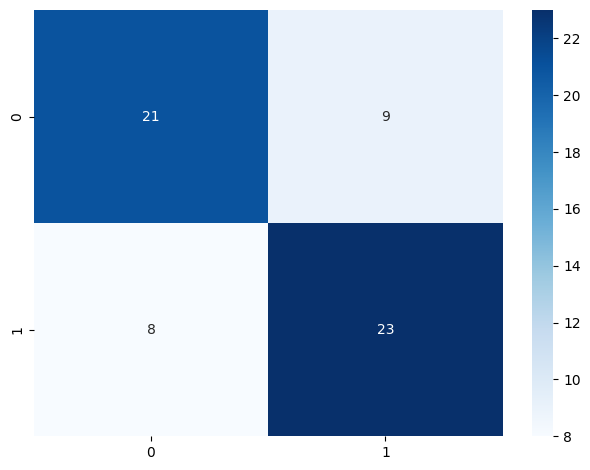

In [44]:
conm(y_pred,y_test,dom = 'Test Data')

In [54]:
pn = 'max_depth'
pv = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,75,100,150]
df = pd.DataFrame(columns=[pn,'train_accuracy', 'test_accuracy'])
for i in pv:
    dt = tree.DecisionTreeClassifier(max_depth = i, splitter = 'best')
    y_pred_train = dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    accuracy_train = accuracy_score(y_test,y_pred)*100
    accuracy_test = accuracy_score(y_train,dt.predict(x_train))*100
    # Create a new row as a DataFrame
    new_row = pd.DataFrame([{pn: i, 'train_accuracy': accuracy_train, 'test_accuracy': accuracy_test}])
    
    # Concatenate the new row with the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)
df

,max_depth,train_accuracy,test_accuracy
0,1,67.213115,78.008299
1,2,68.852459,80.082988
2,3,72.131148,86.721992
3,4,73.770492,88.796680
4,5,75.409836,94.605809
5,6,72.131148,95.850622
6,7,72.131148,97.925311
7,8,73.770492,99.170124
8,9,70.491803,99.585062
9,10,73.770492,100.000000


In [67]:
dt = tree.DecisionTreeClassifier(max_depth = 6, splitter = 'best')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

In [68]:
q = accuracy_score(y_test, y_pred)*100
w = accuracy_score(y_train, y_pred_train)*100
q,w

(72.1311475409836, 95.850622406639)

Train Data confusion matrix


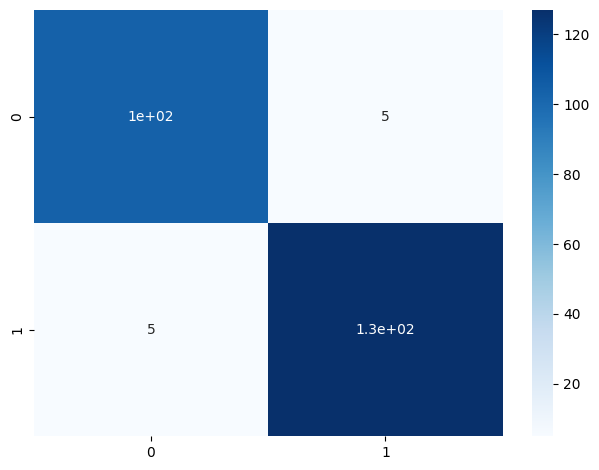

In [69]:
conm(y_train,y_pred_train,dom = 'Train Data')

Tezt Data confusion matrix


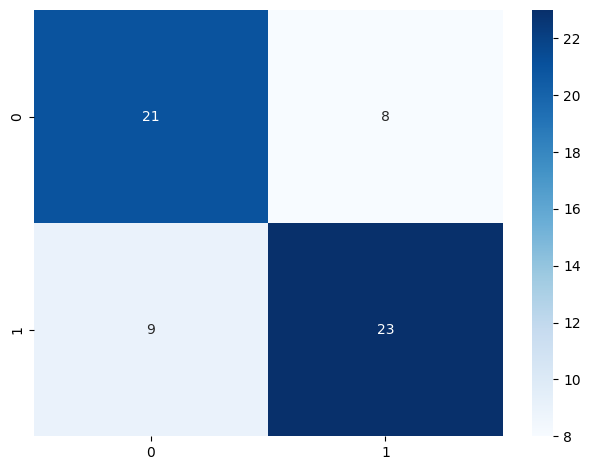

In [70]:
conm(y_test,y_pred,dom = 'Tezt Data')

In [71]:
from sklearn.metrics import classification_report
cr = classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

